# **Quantum-yield high and low with large spot size** &rarr;

High and low powers measured 2 spot sizes using lenses and flip mirror plus beam splitter to attenuate the light. 

**Author: Jean Matias \
UCNP Sample: s013 \
spot sizes: 500um, 100um\
Dye Sample: s017 \
Acquired on: 2021/04/30 \
Analysed on: 2021/05/04 (May the fourth be with you) \
Last Updated: 2022/03/01**

+ Metadata available at the end of the notebook,
+ The final data that generates the plots and their metadata are saved at the end of the notebook in ../data/analysed-data/ folder.


In [1]:
%matplotlib notebook
import sys
sys.path.append('../scripts/')
from lab import Sample, Analysis, BeamProfile
from calibration import *

For details on the analysis protocol and calculation:
>>> help(Analysis)
>>> help(Sample)


In [21]:
help(Analysis)

Help on class Analysis in module lab:

class Analysis(builtins.object)
 |  Analysis(dataPath='../data/raw-data/')
 |  
 |  Creates and handle different Samples.
 |  Ex.:
 |  >>> exp = Analysis()
 |  >>> exp.loaddata(
 |      sampleType='dye',
 |      dataIds=['20201111-101010'],
 |      diluterId='20201111-101110',
 |      emptyId='20201111-101200'
 |  )
 |  
 |  **Analysis protocol**:
 |      In order to get the quantum yield values for a ucnp sample, 
 |      the steps bellow should be followed for a reference dye data
 |      and subsequently for ucnps data. 
 |  
 |      1. Get steady data - it averages data points after the equipmment and samples stabilised. 
 |      2. Calibrate the power meter output (pm) - Volts to mW using standard curves for that.
 |          This is the transmitted power through the cuvette.
 |      3. Calibrate the DAQ output (trigger) - Volts to mW using empty measuremnts.
 |          This is the laser power, i.e. the power before reaching the cuvette.
 | 

In [3]:
help(Sample)

Help on class Sample in module lab:

class Sample(builtins.object)
 |  Sample(path, expId, sampleType)
 |  
 |  Creates an object to handle its data and all the information 
 |  related to its experiment.
 |  
 |  To initialise a sample object use the example:
 |  ```
 |  >>> ucnp = Sample('path/to/data', expId='20210101-101010', sampleType='ucnp')
 |  ```
 |  Sample type can be: ucnp, dye, empty, or diluter. It will define the rules of calculation
 |  for certain methods.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, path, expId, sampleType)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  absorbance(self, diluterAbsorbance=None, filterQuery='laser_power > 0', recalculate=False)
 |      Calculates absorbance of the emitter compound present on the aqueous medium.
 |      
 |      Args: 
 |          diluterAbsorbance (float): Diluter absorbance used as a reference to calculate the emitter's absorbance
 |          recalculate (bool): If True it wil

## Selecting samples:
1. ucnps
2. diluters: e.g. water
3. empties
4. dyes
5. diluters: e.g. ethanol
6. empties

In [2]:
on20210504 = Analysis.datalog['exp_id'].str.contains('20210331') & ~Analysis.datalog['saved_name'].isna() \
    & Analysis.datalog['extra_params'].str.contains('sample=(?:s013|empty|water)/.*976nm')
Analysis.datalog[on20210504]

,exp_id,saved_name,out_ch,range_start,range_end,range_step_size,step_reset,in_chs,time_per_step,samples_per_ch,sampling_rate,min_reading_val,max_reading_val,samples_per_ch_to_read,extra_params,user,app_version
645,20210331-090934,./data/raw-data/qy_20210331_090934.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=empty/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
646,20210331-091102,./data/raw-data/qy_20210331_091102.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=water/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
647,20210331-091239,./data/raw-data/qy_20210331_091239.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=s013/apd gain=min/density filter=0/spot...,jean.matias,QyApp-v1.1.0
648,20210331-091659,./data/raw-data/qy_20210331_091659.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=s013/apd gain=min/density filter=0/spot...,jean.matias,QyApp-v1.1.0
650,20210331-143138,./data/raw-data/qy_20210331_143138.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=s013/apd gain=min/density filter=0/spot...,jean.matias,QyApp-v1.1.0
651,20210331-143352,./data/raw-data/qy_20210331_143352.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=empty/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
652,20210331-143500,./data/raw-data/qy_20210331_143500.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=water/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
653,20210331-150734,./data/raw-data/qy_20210331_150734.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=s013/apd gain=min/density filter=0/spot...,jean.matias,QyApp-v1.1.0
654,20210331-150924,./data/raw-data/qy_20210331_150924.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=empty/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0
655,20210331-151106,./data/raw-data/qy_20210331_151106.csv,ao0=Laser,0.0,5.4,0.08,False,ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw,0.3,1000,3333.333333,0.0,10.0,READ_ALL_AVAILABLE,sample=water/apd gain=min/density filter=0/spo...,jean.matias,QyApp-v1.1.0


# Beam Profile analysis

In [3]:
bp2 = BeamProfile('s2_20210430_976nm_140mA_ND1_ET03.png')
bp2_01 = BeamProfile('s2_20210430_976nm_180mA_ND1_BS50_ET03.png')

bp1 = BeamProfile('s1_20210430_976nm_100mA_ND1_ET002.png')
bp1_01 = BeamProfile('s1_20210430_976nm_100mA_ND1_BS50_ET003.png')

bp1.trim(4.5)
bp1_01.trim(4.5)
bp2_01.trim(1.5)
bp2.trim(1.2)

bp1.removebackground(2)
bp1_01.removebackground(2)
bp2_01.removebackground(3)
bp2.removebackground(3)

<IPython.core.display.Javascript object>


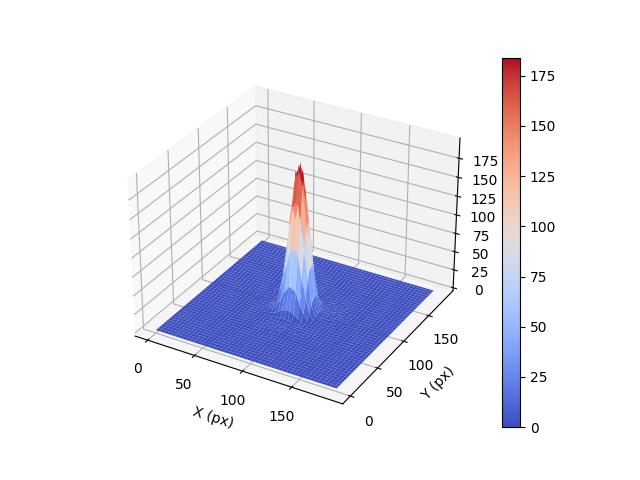

In [4]:
bp1.plotsurf()

<IPython.core.display.Javascript object>


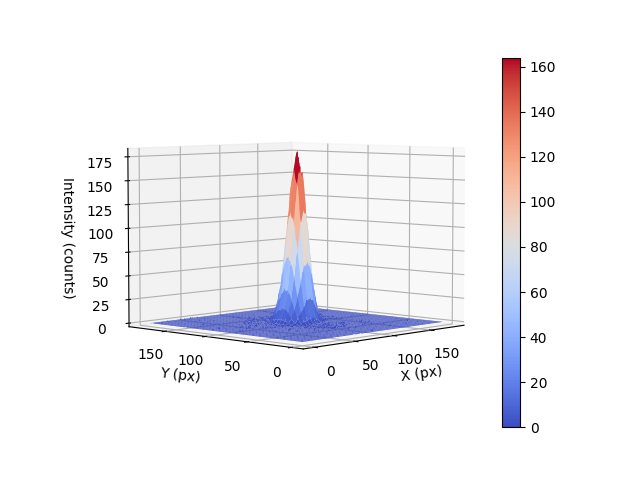

In [11]:
bp1_01.plotsurf()

<IPython.core.display.Javascript object>


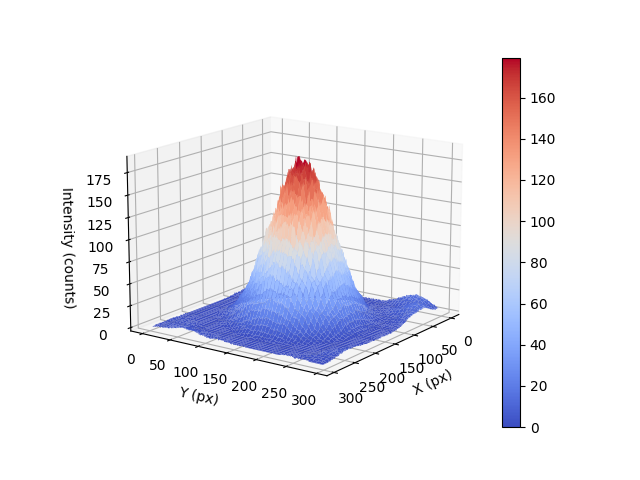

In [6]:
bp2_01.plotsurf()

<IPython.core.display.Javascript object>


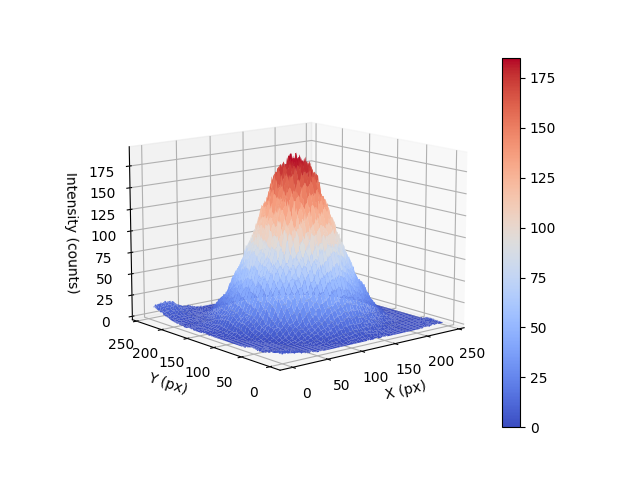

In [8]:
bp2.plotsurf()

In [4]:
print(f'BP1: {bp1.beamwidth():.5f}, BP1 01: {bp1_01.beamwidth():.5f}, BP2: {bp2.beamwidth():.5f}, BP2 01:{bp2_01.beamwidth():.5f} in cm')

BP1: 0.01113, BP1 01: 0.01060, BP2: 0.05300, BP2 01:0.05221 in cm


<IPython.core.display.Javascript object>


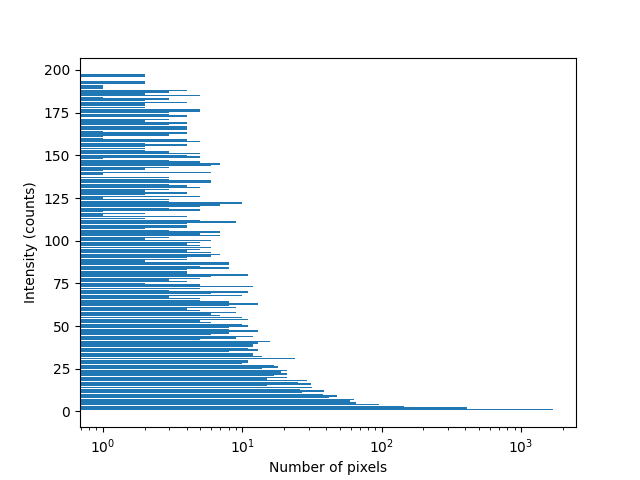

In [15]:
_ = bp1.histprofile(show=True)

<IPython.core.display.Javascript object>


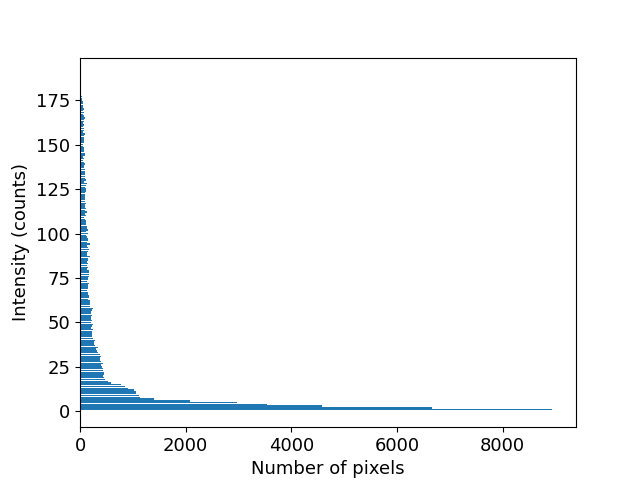

In [73]:
_ = bp2_01.histprofile(show=True)

<IPython.core.display.Javascript object>


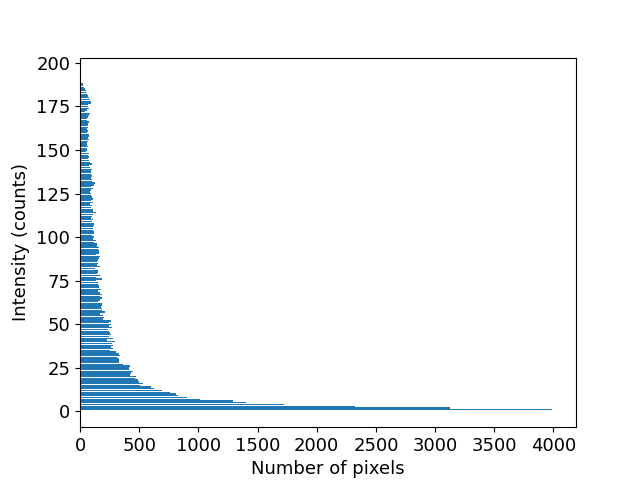

In [74]:
_ = bp2.histprofile(show=True)

# UCNP data

In [5]:
uData = Analysis()

In [6]:
# Beam S. size = s1 ~100um
uData.loaddata('ucnp', dataIds='20210430-120627', diluterId='20210430-120923', emptyId='20210430-120828') # min
# Beam S. size = s1 ~100um BS50:50
uData.loaddata('ucnp', dataIds='20210430-120134', diluterId='20210430-120020', emptyId='20210430-115026') # min

# Beam S. size = 400um
uData.loaddata('ucnp', dataIds='20210430-113345', diluterId='20210430-113227', emptyId='20210430-112928') # min
# Beam S. size = 400um BS50:50
uData.loaddata('ucnp', dataIds='20210430-114054', diluterId='20210430-114329', emptyId='20210430-114220') # min


In [7]:
uData.get('setbeamprofile', dict(beamprofileObj=bp1_01), which=[0, 1, 2])
uData.get('setbeamprofile', dict(beamprofileObj=bp1_01), which=[3,4,5])

uData.get('setbeamprofile', dict(beamprofileObj=bp2), which=[6, 7, 8])
uData.get('setbeamprofile', dict(beamprofileObj=bp2_01), which=[9,10,11])

20210430-120828: empty - Success!
20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!
20210430-115026: empty - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!
20210430-112928: empty - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!
20210430-114220: empty - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


In [9]:
uData.details()

../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

,exp_id,type,sample,apd_gain,comments,density_filter,laser_wavelength,power_meter_range,range_start,range_end,range_step_size,samples_per_ch,sampling_rate,time_per_step
0,20210430-120828,empty,empty,min,BS50:45 instead ND,0,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
1,20210430-120923,diluter,water,min,BS50:45 instead ND,0,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
2,20210430-120627,ucnp,s013,min,BS50:45 instead ND,0,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
3,20210430-115026,empty,empty,min,BS50:45 instead ND,BS50,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
4,20210430-120020,diluter,water,min,BS50:45 instead ND,BS50,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
5,20210430-120134,ucnp,s013,min,BS50:45 instead ND,BS50,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
6,20210430-112928,empty,empty,min,realigned,0,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
7,20210430-113227,diluter,water,min,realigned,0,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
8,20210430-113345,ucnp,s013,min,realigned,0,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3
9,20210430-114220,empty,empty,min,BS50:45 instead ND,BS50,976nm,600mW,0.0,5.4,0.08,1000.0,3333.333333,0.3


### Full details can be obtained by the following:

In [10]:
uData.sample(2).details()

exp_id                                                      20210430-120627
saved_name                           ./data/raw-data/qy_20210430_120627.csv
out_ch                                                            ao0=Laser
range_start                                                             0.0
range_end                                                               5.4
range_step_size                                                        0.08
step_reset                                                            False
in_chs                                ai0=Trigger/ai1=PM/ai2=APD/ai3=APDRaw
time_per_step                                                           0.3
samples_per_ch                                                         1000
sampling_rate                                                   3333.333333
min_reading_val                                                         0.0
max_reading_val                                                        10.0
samples_per_

<IPython.core.display.Javascript object>


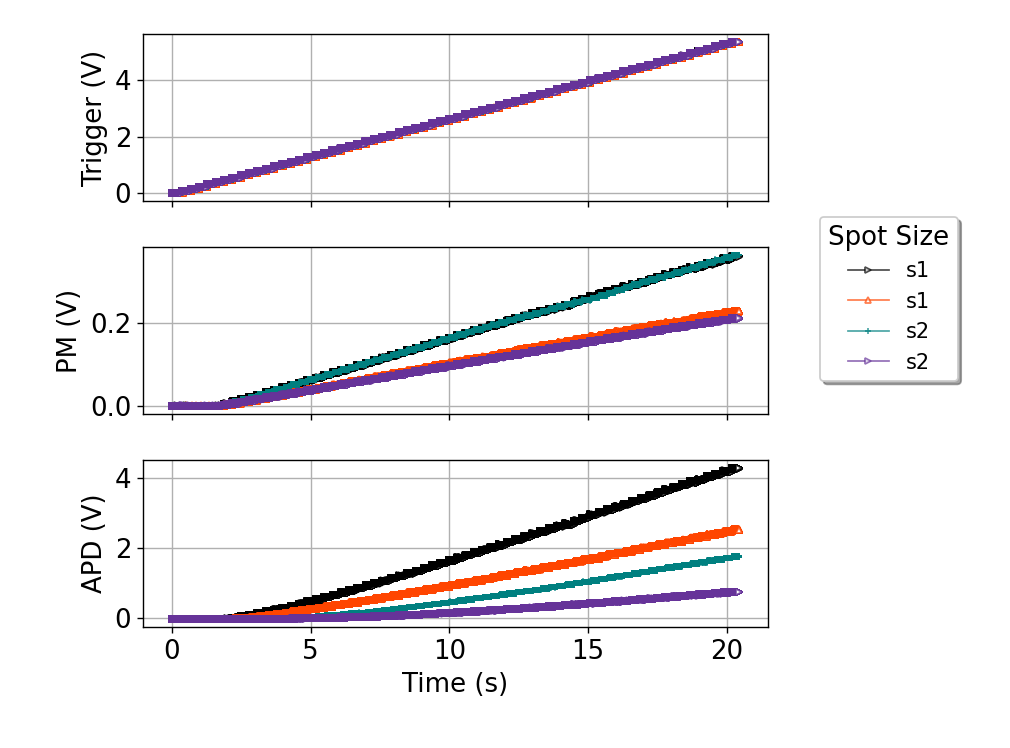

In [8]:
fig, axs = uData.view(includeDiluter=False, includeEmpty=False, label='spot_size')

### Get Steady Data

In [8]:
uData.get('steadydata', dict(fromPt=400, toPt=1000, precision=2), includeDiluter=True ,includeEmpty=True)

20210430-120828: empty - Success!
20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!
20210430-115026: empty - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!
20210430-112928: empty - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!
20210430-114220: empty - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


<IPython.core.display.Javascript object>


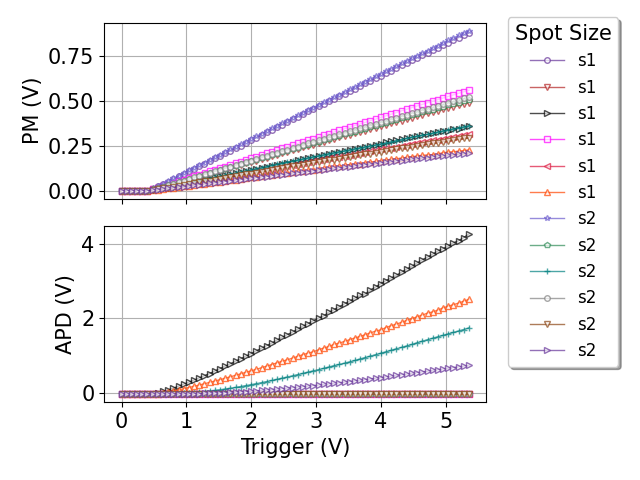

In [12]:
fig, axs = uData.view(x='trigger', yList=['pm', 'apd'], includeDiluter=True, includeEmpty=True, label='spot_size')

### Removing background

In [9]:
uData.get('removebackground', dict(channel='apd', baseline='trigger < 0.2'), includeEmpty=True, includeDiluter=True)

20210430-120828: empty - Success!
20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!
20210430-115026: empty - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!
20210430-112928: empty - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!
20210430-114220: empty - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


In [10]:
uData.get('removebackground', dict(channel='pm', baseline='trigger < 0.2'), includeEmpty=True, includeDiluter=True)

20210430-120828: empty - Success!
20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!
20210430-115026: empty - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!
20210430-112928: empty - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!
20210430-114220: empty - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


<IPython.core.display.Javascript object>


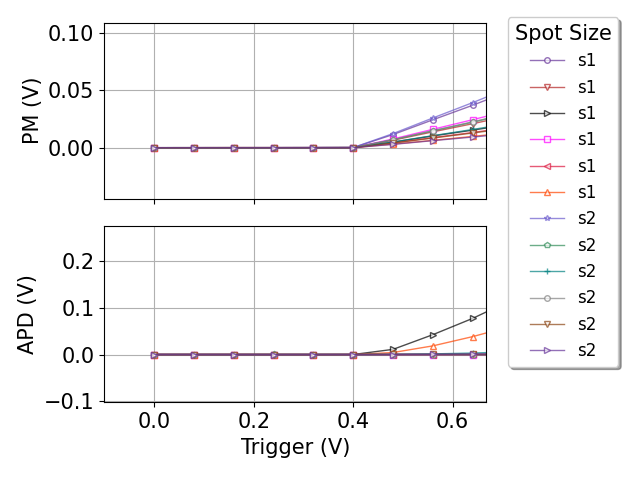

In [13]:
fig, axs = uData.view(x='trigger', yList=['pm', 'apd'], includeDiluter=True, includeEmpty=True, label='spot_size')

### Power meter calibration

<IPython.core.display.Javascript object>


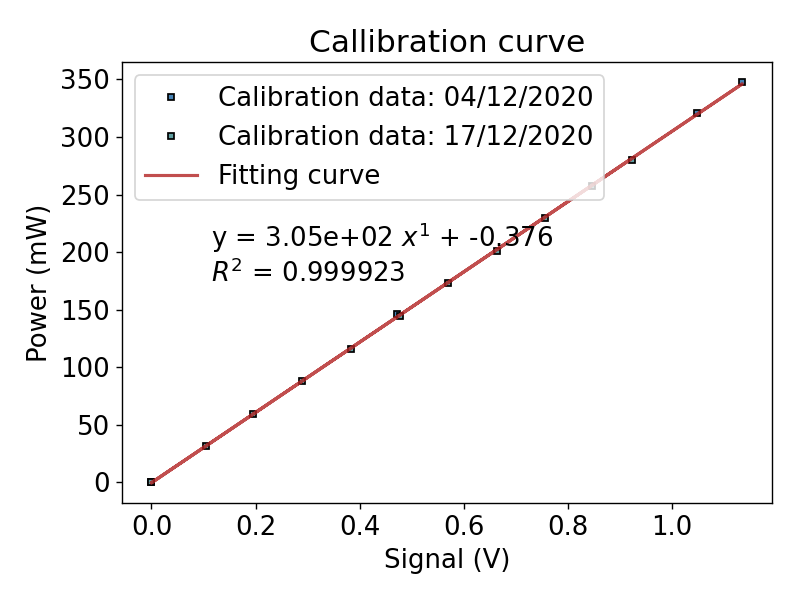

In [11]:
coeffs, r_val = calibratePM(laser=976, pmRange=600, degree=1)


In [12]:
coeffs

[305.16892805223625, -0.37612596104816115]

In [13]:
pmCalibfunc600 = lambda x: coeffs[0] * x + coeffs[1]

In [14]:
uData.get('calibrate', dict(calibFunction=pmCalibfunc600, channel='pm', recalculate=True), includeDiluter=True, includeEmpty=True)

20210430-120828: empty - Success!
20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!
20210430-115026: empty - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!
20210430-112928: empty - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!
20210430-114220: empty - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


<IPython.core.display.Javascript object>


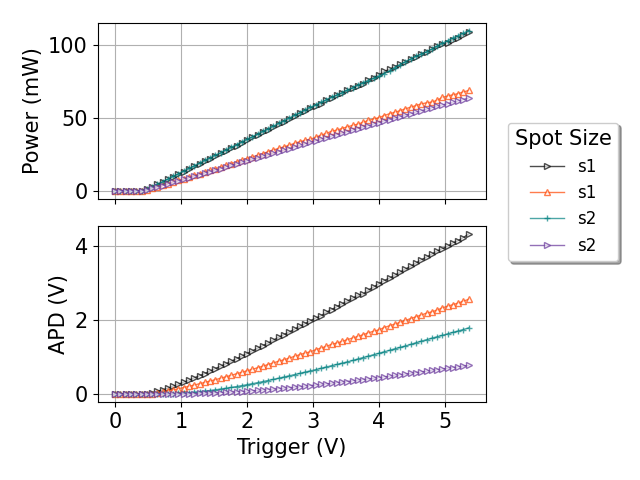

In [19]:
fig, axs = uData.view(x='trigger', yList=['transmitted_power', 'apd'], label='spot_size')

### Trigger calibration

<IPython.core.display.Javascript object>


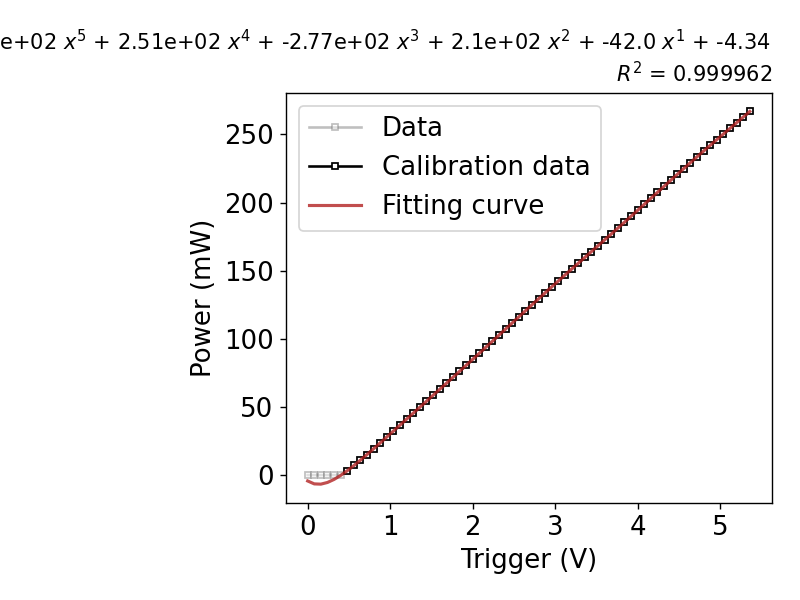

In [15]:
coeffs, r_val = uData.sample(0).polyfit(x='trigger', y='transmitted_power', degree=12, condition='x > 0.44', show=True)
triggerCalib = lambda x: np.poly1d(coeffs)(x)

In [16]:
uData.get('calibrate', dict(calibFunction=triggerCalib, channel='trigger', recalculate=True), which=[0, 1, 2])

20210430-120828: empty - Success!
20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!


<IPython.core.display.Javascript object>


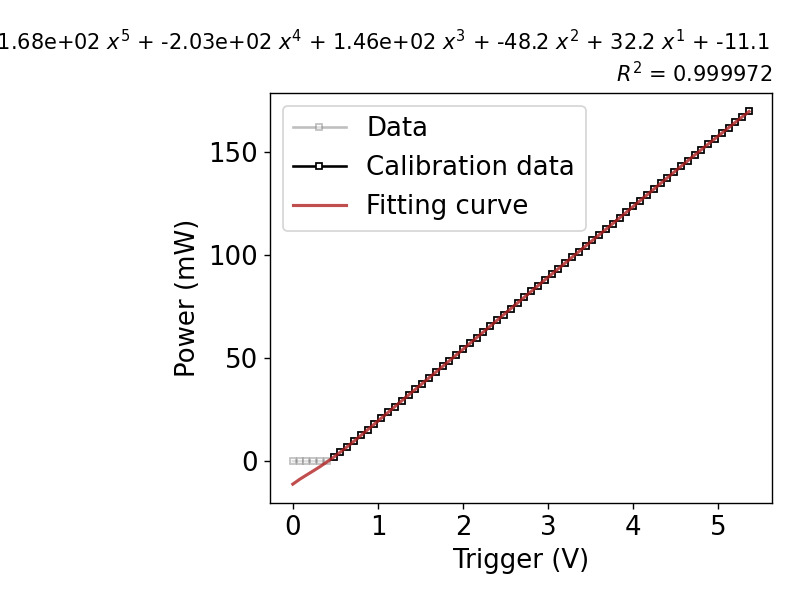

In [17]:
coeffs, r_val = uData.sample(3).polyfit(x='trigger', y='transmitted_power', degree=12, condition='x > 0.44', show=True)
triggerCalib = lambda x: np.poly1d(coeffs)(x)

In [18]:
uData.get('calibrate', dict(calibFunction=triggerCalib, channel='trigger', recalculate=True), which=[3, 4, 5])

20210430-115026: empty - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!


<IPython.core.display.Javascript object>


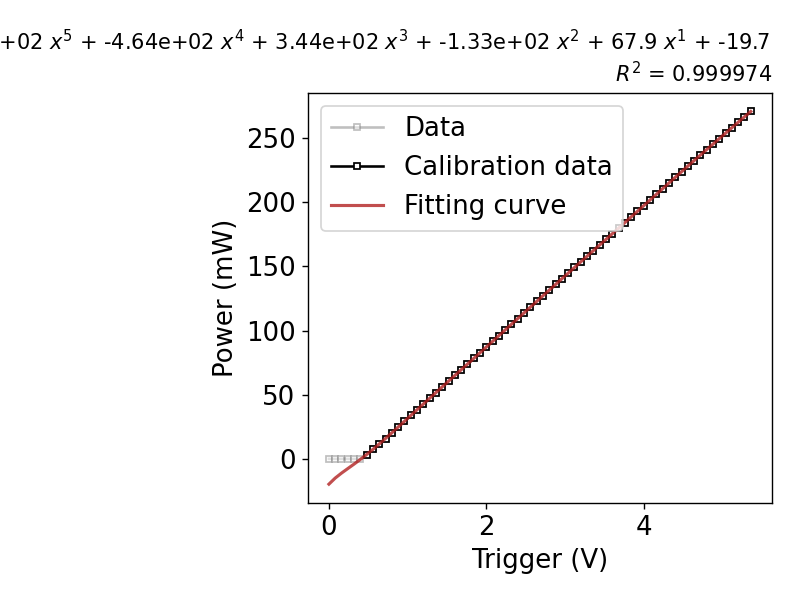

In [19]:
coeffs, r_val = uData.sample(6).polyfit(x='trigger', y='transmitted_power', degree=12, condition='x > 0.44', show=True)
triggerCalib = lambda x: np.poly1d(coeffs)(x)

In [20]:
uData.get('calibrate', dict(calibFunction=triggerCalib, channel='trigger', recalculate=True), which=[6, 7, 8])

20210430-112928: empty - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!


<IPython.core.display.Javascript object>


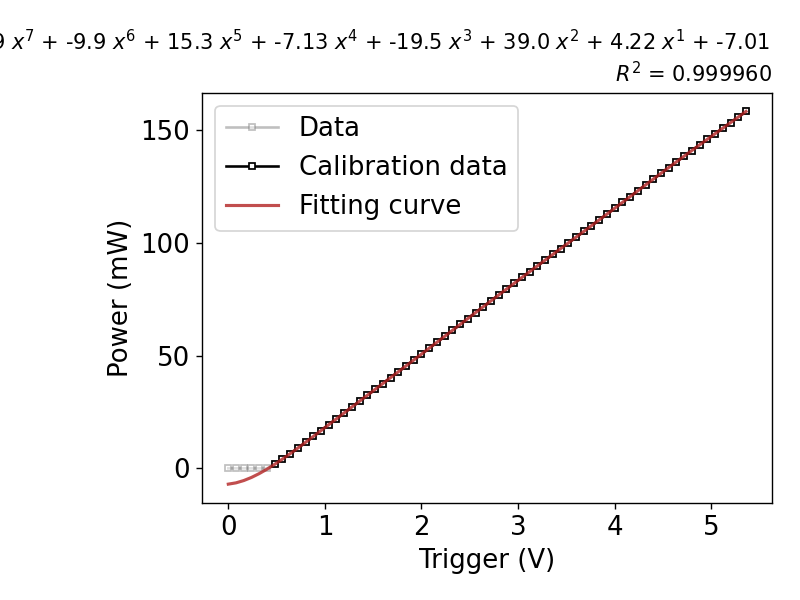

In [21]:
coeffs, r_val = uData.sample(9).polyfit(x='trigger', y='transmitted_power', degree=12, condition='x > 0.44', show=True)
triggerCalib = lambda x: np.poly1d(coeffs)(x)

In [22]:
uData.get('calibrate', dict(calibFunction=triggerCalib, channel='trigger', recalculate=True), which=[9,10,11])

20210430-114220: empty - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


<IPython.core.display.Javascript object>


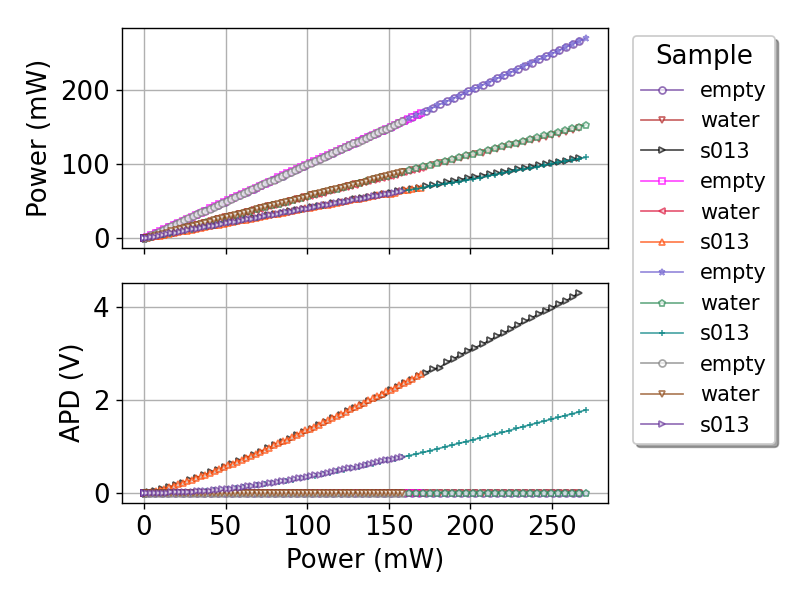

In [23]:
fig, axs = uData.view(x='laser_power', yList=['transmitted_power', 'apd'], label='sample', includeEmpty=True, includeDiluter=True)

### Power density at the centre of the cuvette

In [24]:
help(Sample.powdensatcentre)

Help on function powdensatcentre in module lab:

powdensatcentre(self, beamWidth=None, recalculate=False)
    Calculates power density at the centre of the cuvette.
    Power at the centre/beam area.
    
    Args:
        recalculate (bool): if True it recalculates the power at the centre of the cuvette.



In [177]:
help(Sample.poweratcentre)

Help on function poweratcentre in module lab:

poweratcentre(self, recalculate=False)
    Calculates power at the centre of the cuvette.
    Given by $\sqrt(P_o * P)$
    
    Args:
        recalculate (bool): if True it recalculates the power at the centre of the cuvette.



In [29]:
uData.get('powdensatcentre', dict(recalculate=True), includeDiluter=True, includeEmpty=True)

../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

20210430-120828: empty - Success!
20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!
20210430-115026: empty - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!
20210430-112928: empty - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!
20210430-114220: empty - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.appen

<IPython.core.display.Javascript object>


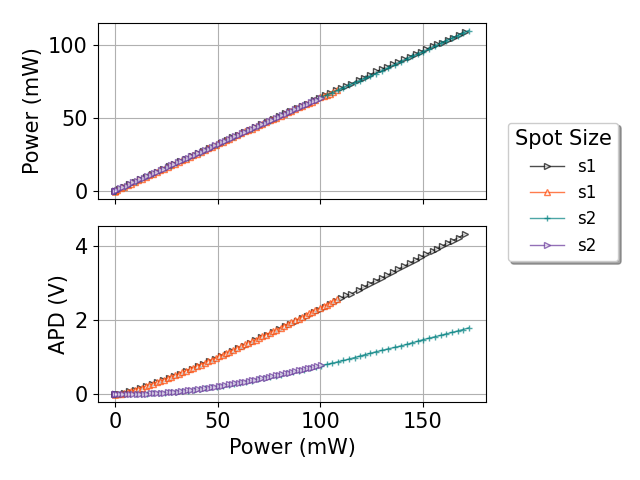

In [30]:
fig, axs = uData.view(x='power_at_centre', yList=['transmitted_power', 'apd'], label='spot_size')

## APD calibration


In [30]:
# Coefficient obtained from Apd-calibration notebook
coeffs = [0.00525246, 0] # dye reabsorption included
apdCalibfuncMin = lambda x: np.poly1d(coeffs)(x)

In [31]:
uData.get('calibrate', dict(calibFunction=apdCalibfuncMin, channel='apd', recalculate=True))

20210430-120627: ucnp - Success!
20210430-120134: ucnp - Success!
20210430-113345: ucnp - Success!
20210430-114054: ucnp - Success!


../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

In [32]:
uData.get('emittedpower', dict(scatteringAtEmission=0.5, recalculate=True))

20210430-120627: ucnp - Success!
20210430-120134: ucnp - Success!
20210430-113345: ucnp - Success!
20210430-114054: ucnp - Success!


../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

<IPython.core.display.Javascript object>


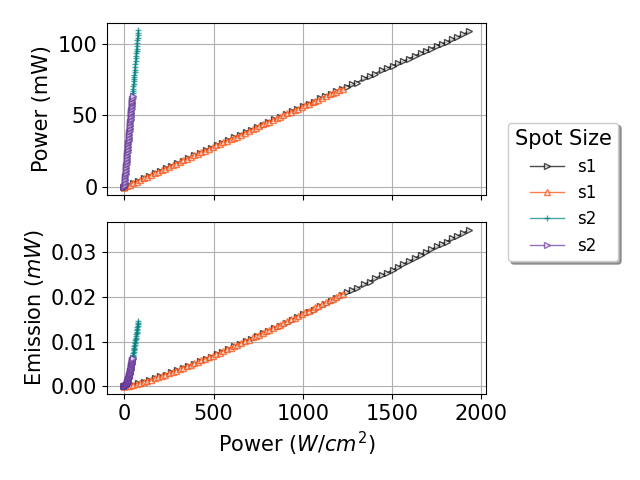

In [34]:
fig, axs = uData.view(x='pow_dens_at_centre', yList=['transmitted_power', 'emitted_power'], label='spot_size')

## Absorbance + Scattering
Sampleabsorbance represents the the absorption coeficient plus scattering. \
Scattering is obtained with white light measurements. 

In [33]:
uData.get('sampleabsorbance',dict(recalculate=True), includeDiluter=True)

../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)


<IPython.core.display.Javascript object>


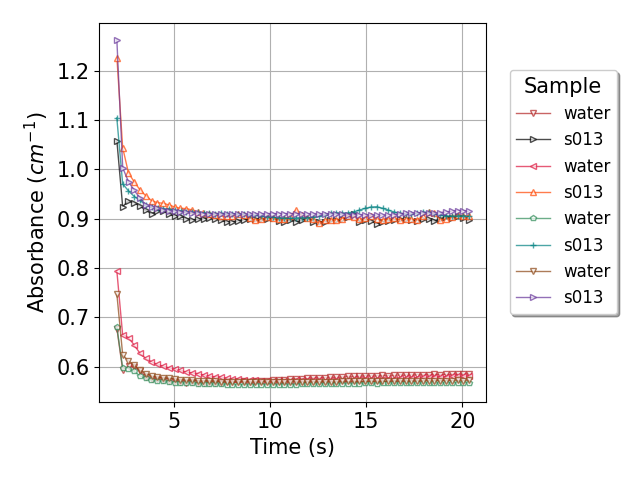

In [36]:
fig, axs = uData.view(x='time_daq', yList=['sample_absorbance'], label='sample', includeDiluter=True)

In [34]:
for k in [1,4,7,10]:
    _, abMean, abStd, _ = uData.sample(k).sampleabsorbance(filterQuery='time_daq > 10', recalculate=True)
    print(f'{uData.sample(k)._dataID}-{uData.sample(k)._sampleType}: {abMean=}, {abStd=}')

20210430-120923-diluter: abMean=0.5802187177638544, abStd=0.003900544204653685
20210430-120020-diluter: abMean=0.5750551746729965, abStd=0.003250558948369527
20210430-113227-diluter: abMean=0.565511342644733, abStd=0.0013235354316093548
20210430-114329-diluter: abMean=0.5702465562631793, abStd=0.001000199391476755


In [35]:
uData.get('absorbance', dict(recalculate=True), includeDiluter=True)

20210430-120923: diluter - Success!
20210430-120627: ucnp - Success!
20210430-120020: diluter - Success!
20210430-120134: ucnp - Success!
20210430-113227: diluter - Success!
20210430-113345: ucnp - Success!
20210430-114329: diluter - Success!
20210430-114054: ucnp - Success!


../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

In [31]:
uData.sample(11).absorbance(filterQuery='time_daq > 10', recalculate=True)

(0          NaN
 1          NaN
 2          NaN
 3          NaN
 4          NaN
         ...   
 63    0.343571
 64    0.344981
 65    0.346035
 66    0.345985
 67    0.344327
 Name: absorbance, Length: 68, dtype: float64,
 0.34002209804944966,
 0.002499419719701178,
 '20210430-114054: ucnp - Success!')

<IPython.core.display.Javascript object>


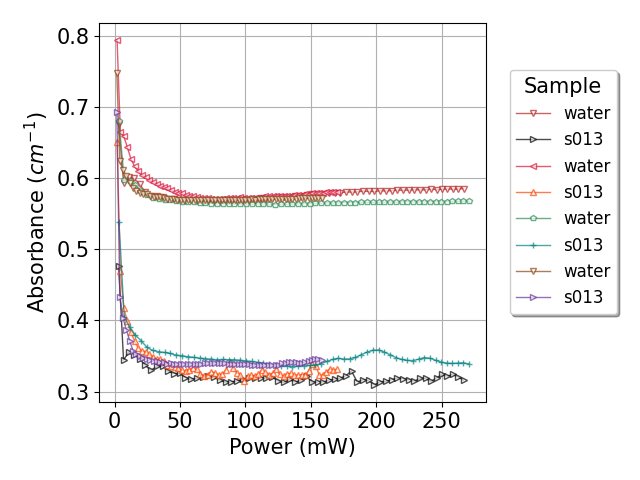

In [39]:
fig, axs = uData.view(x='laser_power', yList=['absorbance'], label='sample', includeDiluter=True)

In [36]:
uData.get('absorbedpower', dict(filterQuery='time_daq > 10', recalculate=True, absorptionCoeff=0.050243))

../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

20210430-120627: ucnp - Success!
20210430-120134: ucnp - Success!
20210430-113345: ucnp - Success!
20210430-114054: ucnp - Success!


../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)
../scripts\lab.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._metadata = self._metadata.append(pd.DataFrame(params), ignore_index=True)


<IPython.core.display.Javascript object>


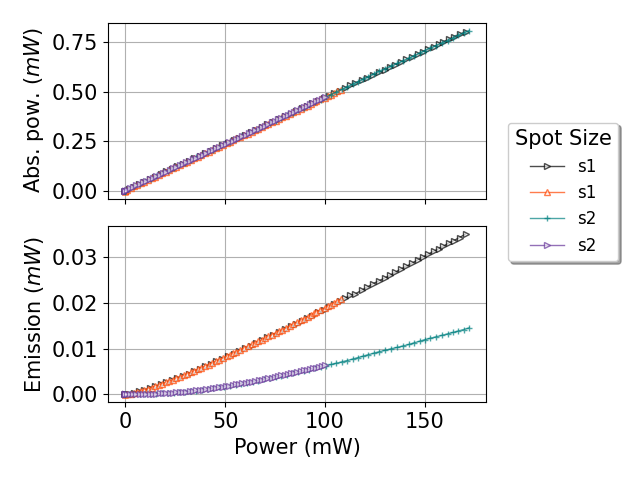

In [41]:
fig, axs = uData.view(x='power_at_centre', yList=['absorbed_power', 'emitted_power'], label='spot_size')

## Get kappa $\kappa$

In [37]:
uData.get('kappa', dict(period=10, recalculate=True))

../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

20210430-120627: ucnp - Success!
20210430-120134: ucnp - Success!
20210430-113345: ucnp - Success!
20210430-114054: ucnp - Success!


<IPython.core.display.Javascript object>


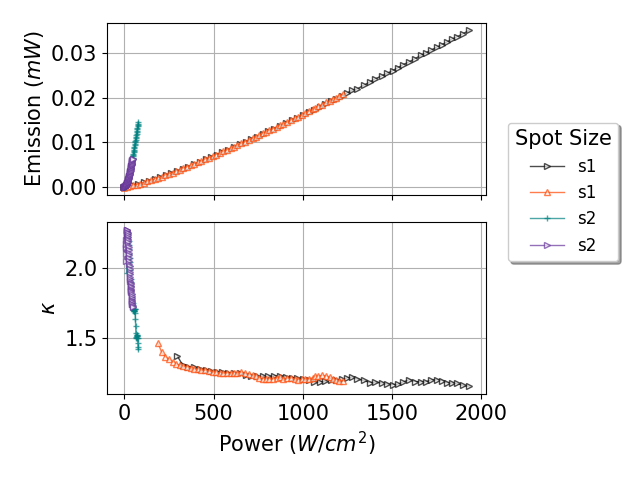

In [38]:
fig, axs = uData.view(x='pow_dens_at_centre', yList=['emitted_power', 'kappa'], label='spot_size')

## Quantum Yield $\phi$

In [39]:
uData.get('quantumyield', dict(recalculate=True))

20210430-120627: ucnp - Success!
20210430-120134: ucnp - Success!
20210430-113345: ucnp - Success!
20210430-114054: ucnp - Success!


../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.py:1293: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._details = self._details.append(
../scripts\lab.

<IPython.core.display.Javascript object>


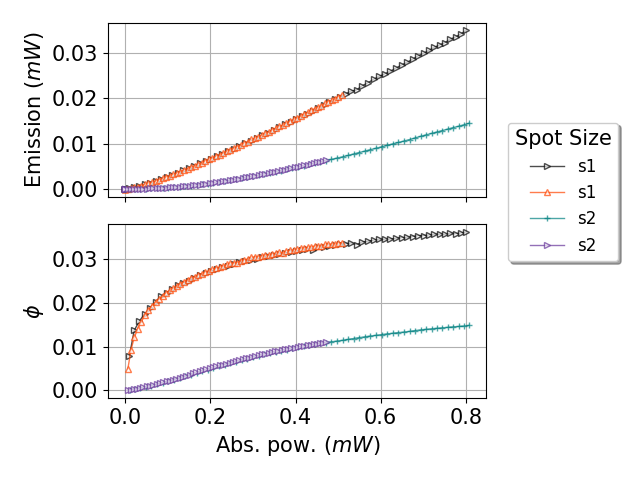

In [45]:
fig, axs = uData.view(x='absorbed_power', yList=['emitted_power', 'quantum_yield'], which=[2, 5, 8,11], label='spot_size')

<IPython.core.display.Javascript object>


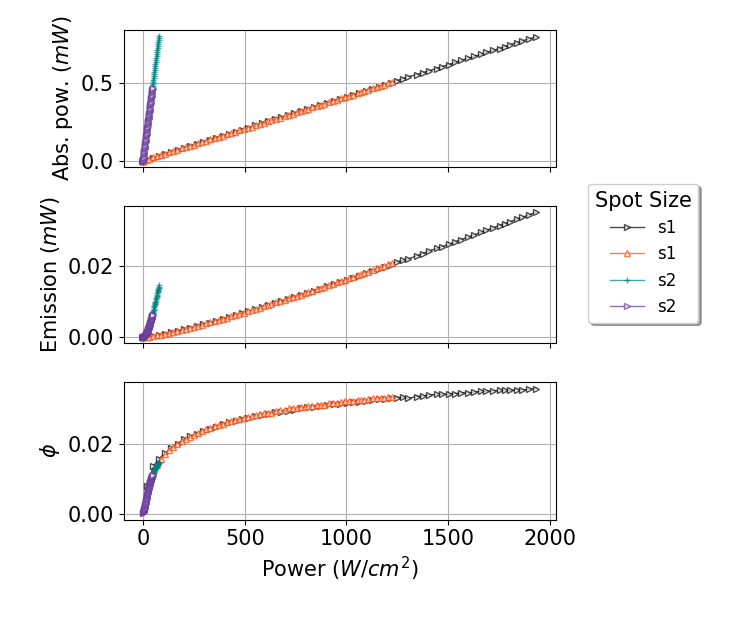

In [46]:
fig, axs = uData.view(x='pow_dens_at_centre', yList=['absorbed_power', 'emitted_power', 'quantum_yield'], which=[2, 5, 8,11], label='spot_size')

In [40]:
pl.tight_layout()

### Fitting emission according to a simplified model

$E = 2 \phi_b \alpha_{976} A_{px} \frac{\lambda_e}{\lambda_a} \sum_k^N  \frac{\rho_k^2}{\rho_b + \rho_k}$

Being $\alpha_{976}$ the absorption coeficient of the UCNP's at 976 $nm$, $A_{px}$ the area of a pixel,
$\rho$ power density

In [40]:
def formatcoefs(popt, pcov): 
    perr = np.sqrt(np.diag(pcov))
    phib = popt[0]; phib_err = perr[0]
    rhob = popt[1]; rhob_err = perr[1]
    print(f'phi_b = {popt[0]:.4f}({perr[0]:.4f}), rho_b = {popt[1]/1000:.2f}({perr[1]/1000:.2f})W/cm^2')
    return(phib, phib_err, rhob, rhob_err)

<IPython.core.display.Javascript object>


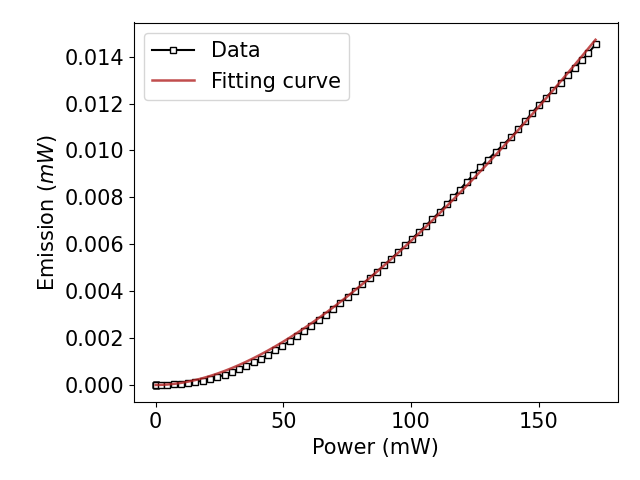

phi_b = 0.0189(0.0004), rho_b = 38.22(1.50)W/cm^2


In [41]:
popt, pcov, emissionF8, _ = uData.sample(8).fitemission(bounds=([0, 0], [1, 1e+5]), show=True)
phib, phib_err, rhob, rhob_err = formatcoefs(popt, pcov)

## Converting units

In [42]:
rhob /= 1000
rhob_err /= 1000
phib *= 100
phib_err *= 100

In [43]:
print(f"{rhob=:.1f} pm {rhob_err=:.1f}, {phib=:.2f} pm {phib_err:.2f}")

rhob=38.2 pm rhob_err=1.5, phib=1.89 pm 0.04


### Fitting graphs

<IPython.core.display.Javascript object>


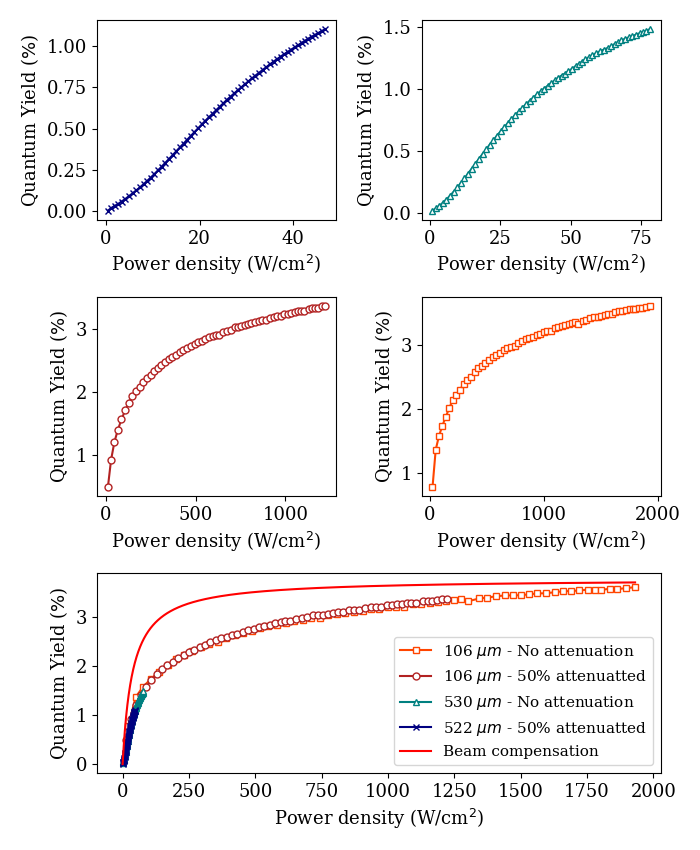

In [44]:
pl.rcParams.update({'font.size': 13})
pl.rcParams.update({'font.family':'serif'})
def qy(p, phib, rhob): return (phib * p / (rhob + p))

fig = pl.figure(figsize=(7,8.5))
xlabel = 'Power density (W/cm$^2$)'
ylabel = 'Quantum Yield ($\%$)'

ax1 = pl.subplot2grid((3,2), (0,0))
ax2 = pl.subplot2grid((3,2), (0,1))
ax3 = pl.subplot2grid((3,2), (1,0))
ax4 = pl.subplot2grid((3,2), (1,1))
ax5 = pl.subplot2grid((3,2), (2,0), colspan=2)

ax1.set_xlabel(xlabel)
ax2.set_xlabel(xlabel)
ax3.set_xlabel(xlabel)
ax4.set_xlabel(xlabel)
ax5.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax2.set_ylabel(ylabel)
ax3.set_ylabel(ylabel)
ax4.set_ylabel(ylabel)
ax5.set_ylabel(ylabel)

# fig, ax = pl.subplots()
ax4.plot(uData.sample(2).data()['pow_dens_at_centre'], uData.sample(2).data()['quantum_yield']*100, '-s', color='orangered', mfc='w', ms='5')
ax3.plot(uData.sample(5).data()['pow_dens_at_centre'], uData.sample(5).data()['quantum_yield']*100, '-o', color='firebrick', mfc='w', ms='5')
ax2.plot(uData.sample(8).data()['pow_dens_at_centre'], uData.sample(8).data()['quantum_yield']*100, '-^', color='teal', mfc='w', ms='5')
ax1.plot(uData.sample(11).data()['pow_dens_at_centre'], uData.sample(11).data()['quantum_yield']*100, '-x', color='navy', mfc='w', ms='5')


ax5.plot(uData.sample(2).data()['pow_dens_at_centre'], uData.sample(2).data()['quantum_yield']*100, '-s', color='orangered', mfc='w', ms='5', label='106 $\mu m$ - No attenuation')
ax5.plot(uData.sample(5).data()['pow_dens_at_centre'], uData.sample(5).data()['quantum_yield']*100, '-o', color='firebrick', mfc='w', ms='5', label='106 $\mu m$ - 50% attenuatted')
ax5.plot(uData.sample(8).data()['pow_dens_at_centre'], uData.sample(8).data()['quantum_yield']*100, '-^', color='teal', mfc='w', ms='5', label='530 $\mu m$ - No attenuation')
ax5.plot(uData.sample(11).data()['pow_dens_at_centre'], uData.sample(11).data()['quantum_yield']*100, '-x', color='navy', mfc='w', ms='5', label='522 $\mu m$ - 50% attenuatted')

# fitted model
power = np.arange(0, 1932, 0.5)
ax5.plot(power, qy(power, 2*phib, rhob), '-', color='red', label='Beam compensation')
pl.ylabel(ylabel)
pl.xlabel(xlabel)
pl.legend(fontsize=11)
fig.tight_layout()


In [45]:
# save figure
fig.savefig('../plots/Fig5.png')

In [58]:
# emission
data = '../data/emission/s013_20210521_emission_QEP025961.txt'
data = pd.read_csv(data, sep='\t', skiprows=15, names=['Wavelength', 'Intensity'])

In [59]:
data

,Wavelength,Intensity
0,346.573,1.25
1,347.359,-0.75
2,348.146,-1.75
3,348.933,246.25
4,349.719,227.25
...,...,...
1038,1123.340,397.25
1039,1124.047,-3.75
1040,1124.754,-5.75
1041,1125.460,-2.75


<IPython.core.display.Javascript object>


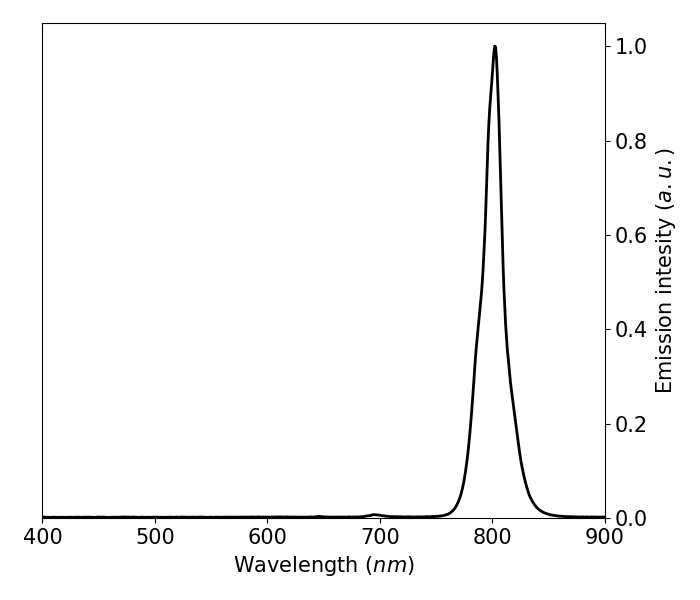

In [60]:
pl.rcParams.update({'font.size': 15})
fig, ax = pl.subplots(figsize=(7, 6))
ax.plot(data['Wavelength'], data['Intensity']/data['Intensity'].max(), color='k', label='Emission spectrum', lw=2)

ax.set_xlabel('Wavelength ($nm$)')
ax.set_ylabel('Emission intesity ($a.u.$)')
ax.set_ylim([0,1.05])
ax.set_xlim([400,900])
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
# ax.grid()
pl.tight_layout()

In [50]:
fig.savefig('../plots/spectrum.pdf')

# Exporting analysed data that generate the plots

In [83]:
for idx in uData.details().index:
    fileName = '../data/analysed-data/' + uData.details().loc[idx, 'exp_id'] + '_' + uData.sample(idx)._sampleType + '_analysed.csv' 
    metadataName = '../data/analysed-data/' + uData.details().loc[idx, 'exp_id'] + '_metadata.csv' 
    
    uData.sample(idx).data().to_csv(fileName)
    uData.sample(idx)._metadata.to_csv(metadataName)

In [84]:
uData.sample(11)._metadata

,field_name,data_type,data_format,example,standard_units,plot_label,description
0,time,float,^([0-9]?\.|[1-9][\d]*\.)[0-9]*$,123423.982734,seconds,Time (s),Positive float number for time acquired with p...
1,trigger,float,^[-]?([0-9]?\.|[1-9][\d]*\.)[0-9]*$,-1.998340,volts,Trigger (V),Daq input channel
2,pm,float,^[-]?([0-9]?\.|[1-9][\d]*\.)[0-9]*$,-1.998340,volts,PM (V),Daq input channel
3,apd,float,^[-]?([0-9]?\.|[1-9][\d]*\.)[0-9]*$,-1.998340,volts,APD (V),Daq input channel
4,time_daq,float,^[-]?([0-9]?\.|[1-9][\d]*\.)[0-9]*$,0.029380,s,Time (s),Time acquired from the Daq internal clock
5,transmitted_power,float,^[0-9]*.[0-9]*,5.500000,mW,Power (mW),Transmitted Power - Obtained from pm calibration.
6,laser_power,float,^[0-9]*.[0-9]*,5.500000,mW,Power (mW),Laser Power - Obtained from trigger calibration.
7,power_at_centre,float,^[0-9]*.[0-9]*,100.565000,mW,Power (mW),Power at the center of the cuvette.
8,pow_dens_at_centre,float,^[0-9]*.[0-9]*,10000.565000,W/cm^2,Power ($W/cm^2$),Power density at the center of the cuvette.
9,apd_power,float,^[0-9]*.[0-9]*,5.500000,mW,Power (mW),Apd Power - Obtained from apd calibration.
